# IBM HR Analytics

[link](url:https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

<a id='section0'></a>
## Table of Contents

- [1.0 - Exploratory Data Analysis](#section1)
    - [1.1 - Retrieve and View Data](#section1.1)
    - [1.2 - Clean Data](#section1.2)
    - [1.3 - Create Data for Exploratory Data Analysis](#section1.3)
    - [1.4 - Create Functions for Exploratory Data Analysis](#section1.4)
- [2.0 - Visualization of Relationships](#section2)
    - [2.1 - Scatter Matrix](#section2.1)
    - [2.2 - Distribution of Numeric Variables](#section2.2)
        - [Age](#age_numeric)
        - [Distance from Home](#distancefromhome_numeric)
        - [Monthly Income](#monthlyincome_numeric)
        - [Number of Companies Worked](#num_co_worked)
        - [Percent Salary Hike](#per_salary_hike)
        - [Training Time Last Year](#training_time_last_year)
        - [Total Years Working](#total_yrs_working)
        - [Years at Company](#years_at_company)
        - [Years since Last Promotion](#years_since_last_promo)
        - [Years in Current Role](#yrs_in_curr_role)
        - [Years with Current Manager](#years_with_curr_mgr)
    - [2.3 - Distribution of Categorical Variables](#section2.3)
        - [Categorical Function Definition](#functiondef)
        - [Age](#age)
        - [Business Travel](#businesstravel)
        - [Department](#department)
        - [Distance from Home](#distancefromhome)
        - [Education](#education)
        - [Education Field](#educationfield)
        - [Environment Satisfaction](#environmentsatisfaction)
        - [Gender](#gender)
        - [Job Involvement](#jobinvolvement)
        - [Job Level](#joblevel)
        - [Job Role](#jobrole)
        - [Job Satisfaction](#jobsatisfaction)
        - [Marital Status](#maritalstatus)
        - [Overtime](#overtime)
        - [Performance Rating](#performancerating)
        - [Relationship Satisfaction](#relationshipsatisfaction)
        - [Stock Option Level](#stock_option_level)
        - [Work Life Balance](#worklifebalance)
- [3.0 - Model Development](#section3)
    - [3.1 - Pre-Processing for Model Development](#section3.1)
    - [3.2 - Create Training and Testing Data Sets](#section3.2)
    - [3.3 - Define Functions for Model Generation](#section3.3)
    - [3.4 - Models](#section3.4)
        - [Linear Discriminat Algorithm](#lda)
        - [Logistic Regression Algorithm](#logreg)
        - [SGD Algorithm](#sgd)

In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='section1'></a><h2>1.0 - Exploratory Data Analysis</h2>

<a id='section1.1'></a><h3>1.1 - Retrieve and View Data</h3>

[back to TOC](#section0)

In [2]:
hr = (pd.read_excel('../data/HR-Employee-Attrition.xlsx', sheet_name=0)
          .drop(columns=['EmployeeNumber', 'EmployeeCount',
                         'Over18', 'StandardHours', 'DailyRate', 
                         'HourlyRate', 'MonthlyRate']))

#### Look at first few rows of data

In [3]:
hr.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0


#### Look at all columns

In [4]:
hr.columns.sort_values()

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

#### View data type for each column

In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [6]:
print('# of quantitative fields', hr.select_dtypes('number').shape[1])
print('# of qualitative fields', hr.select_dtypes('object').shape[1])

# of quantitative fields 20
# of qualitative fields 8


<a id='section1.2'></a>
### 1.2 - Clean Data

[back to TOC](#section0)

#### Check for NULL Values

In [7]:
# Check for Null valuess in each row
print(hr.isnull().sum())
print('-----------------------------')
# Check for Null values in dataset
print('Total Null Values:', hr.isnull().sum().sum())

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64
-----------------------------
Total Null Values: 0


#### Map Categorical Data to Label

In [8]:
cat_cols = [
    'Education', 'EnvironmentSatisfaction', 
    'JobInvolvement', 'JobSatisfaction', 
    'PerformanceRating', 'RelationshipSatisfaction',
    'WorkLifeBalance'
    ]

In [9]:
hr[cat_cols].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


In [10]:
from pandas.api.types import CategoricalDtype

edu_cat = {1:'Below College', 2:'College', 3:'Bachelor',
           4:'Master', 5:'Doctor'}
satisfaction = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
perf_rating = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
work_life_balance = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}

for col, cat in zip(cat_cols, [edu_cat, satisfaction, 
                              satisfaction, satisfaction,
                              perf_rating, satisfaction,
                              work_life_balance]):
    hr[col] = hr[col].map(cat)
    hr[col] = hr[col].astype(CategoricalDtype(cat.values(), ordered=True))

hr['BusinessTravel'] = hr['BusinessTravel'].astype(CategoricalDtype(
    ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], ordered=True))

hr.select_dtypes(include='category').head(3)

,BusinessTravel,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,Travel_Rarely,College,Medium,High,Very High,Excellent,Low,Bad
1,Travel_Frequently,Below College,High,Medium,Medium,Outstanding,Very High,Better
2,Travel_Rarely,College,Very High,Medium,High,Excellent,Medium,Better


<a id='section1.3'></a>
### 1.3 - Create Data for Exploratory Data Analysis

[back to TOC](#section0)

In [11]:
from collections import namedtuple
Attrition = namedtuple('attrition', ['x', 'y', 'title'])

In [12]:
data = [
        Attrition(hr['Age'], hr['MonthlyIncome'], 'Age vs. Monthly Income'),
        Attrition(hr['Age'], hr['DistanceFromHome'], 'Age vs. Distance from Home'),
        Attrition(hr['Age'], hr['EnvironmentSatisfaction'], 'Age vs. Environment Satisfaction'),
        Attrition(hr['Age'], hr['PerformanceRating'], 'Age vs. Performance Rating'),
        Attrition(hr['YearsSinceLastPromotion'], hr['Age'], 'Age vs. Years since last Promotion'),
        Attrition(hr['YearsSinceLastPromotion'], hr['WorkLifeBalance'], 'Years since last Promotion vs. Work Life Balance'),
        Attrition(hr['YearsSinceLastPromotion'], hr['YearsInCurrentRole'], 'Years since last Promotion vs. Yrs in curr Role'),
        Attrition(hr['YearsSinceLastPromotion'], hr['StockOptionLevel'], 'Years since last Promotion vs. Stock Option Level'),
        Attrition(hr['PerformanceRating'], hr['MonthlyIncome'], 'Performance Rating vs. Monthly Income'),
        Attrition(hr['PerformanceRating'], hr['JobSatisfaction'], 'Performance Rating vs. Job Satisfaction'),
        Attrition(hr['PerformanceRating'], hr['WorkLifeBalance'], 'Performance Rating vs. Work Life Balance'),
        Attrition(hr['PerformanceRating'], hr['YearsSinceLastPromotion'], 'Performance Rating vs. Yrs since last Promotion'),
        Attrition(hr['JobSatisfaction'], hr['MonthlyIncome'], 'Job Satisfaction vs. Monthly Income'),
        Attrition(hr['JobSatisfaction'], hr['YearsSinceLastPromotion'], 'Job Satisfaction vs. Yrs since last Promotion'),
        Attrition(hr['JobSatisfaction'], hr['Age'], 'Job Satisfaction vs. Age'),
        Attrition(hr['JobSatisfaction'], hr['StockOptionLevel'], 'Job Satisfaction vs. Stock Option Level')
    ]

<a id='section1.4'></a>
### 1.4 - Create Functions for Exploratory Data Analysis

[back to TOC](#section0)

In [13]:
def kde_plot_matrix(data_list, rows, cols, figsize=(10, 8)):
    def _kde_plot(x, y, title, ax, cmap=None):
        if cmap is None:
            cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

        sns.kdeplot(x, y, cmap=cmap, shade=True, ax=ax)
        ax.set(title=title)
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize, sharex=False, sharey=False)
    start = np.linspace(0, 3, rows*cols).reshape(rows, cols)
    
    counter = 0
    for i, ax_list in enumerate(axes):
        for j, ax in enumerate(ax_list):
            cmap = sns.cubehelix_palette(start=start[i][j], light=1, as_cmap=True)
            _kde_plot(x=data_list[counter].x, y=data_list[counter].y, 
                      title=data_list[counter].title, ax=ax, cmap=cmap)
            counter += 1
    fig.tight_layout()
    return None

In [14]:
def create_violin_plot(data, x, y, hue, title, figsize=(10, 5),
                       style='white', palette={'Yes': 'coral'}):
    f, ax = plt.subplots(figsize=figsize)
    with sns.axes_style(style=style):
        sns.violinplot(data=data, x=x, y=y, hue=hue,
                       split=True, inner='quart', linewidth=1,
                       palette={**palette, **{'No': '.85'}});
#         sns.despine(left=True, bottom=True)
        sns.despine(offset=10, trim=True);
        plt.title(title)
    return ax

In [15]:
def create_hist(data, x, hue, figsize=(8, 5), style='white', palette='light:m_r'):
    f, ax = plt.subplots(figsize=figsize)
    with sns.axes_style(style=style):
        sns.histplot(data=data, x=x, hue=hue, ax=ax, multiple='stack', 
                     palette=palette, edgecolor=".3", linewidth=1);
        sns.despine()
    return ax

In [16]:
def create_kde(data, x, hue, figsize=(8, 4), vline=False, vline_offset=2,
               style='white', palette={'Yes': 'green'}):
    f, ax = plt.subplots(figsize=figsize)
    
    with sns.axes_style(style='white'):
        ax = sns.kdeplot(data=data, x=x, hue=hue, fill=True, ax=ax, 
                         palette={**{'No': '.85'}, **palette});
        sns.despine()
        
        ymin, ymax = ax.get_ylim()
        yes_median =  data.loc[data[hue].eq('Yes'), x].median()
        no_median = data.loc[data[hue].eq('No'), x].median()
        
        if vline:
            if yes_median == no_median:
                plt.vlines(x=yes_median, ymin=ymin, ymax=ymax, 
                     color='gray', linestyle='-', linewidth=2)
                ax.annotate(f'Median - Yes & No\n({yes_median:,.0f})', 
                            xy=(yes_median+vline_offset, ymax*.95),
                            horizontalalignment='left',
                            verticalalignment='top', fontsize=10)
                return ax 
            # Yes - Attrition
            plt.vlines(x=yes_median, ymin=ymin, ymax=ymax, 
                     color='red', linestyle='-', linewidth=2)
            ax.annotate(f'Yes - Median\n({yes_median:,.0f})', xy=(yes_median-vline_offset, ymax*.95),
                       horizontalalignment='right',
                       verticalalignment='top', fontsize=10)
            # No - Attrition
            plt.vlines(x=no_median, ymin=ymin, ymax=ymax, 
                     color='orange', linestyle='-', linewidth=2)
            ax.annotate(f'No - Median\n({no_median:,.0f})', xy=(no_median+vline_offset, ymax*.95),
                       horizontalalignment='left',
                       verticalalignment='top', fontsize=10)
    return ax

In [17]:
yes_mask = hr['Attrition'].eq('Yes')
no_mask = hr['Attrition'].eq('No')

def descriptive_stats(data, attr, bool_mask=(yes_mask, no_mask)):
    yes_mask, no_mask = bool_mask
    yes_series = hr.loc[yes_mask, attr].describe().apply(lambda x: f'{x:,.0f}').rename('Yes')
    no_series = hr.loc[no_mask, attr].describe().apply(lambda x: f'{x:,.0f}').rename('No')
    total_series = hr[attr].describe().apply(lambda x: f'{x:,.0f}').rename('Total')
    df = pd.concat([yes_series, no_series, total_series], axis=1).T
    df.columns = df.columns.str.title()
    return df

In [18]:
def create_corr_matrix(df, title='Correlation Matrix'):
    f = plt.figure(figsize=(19, 15))
    plt.matshow(df.corr(), fignum=f.number)
    plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
    plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title(title, fontsize=16);
    return None

<a id='section2'></a><h2>2.0 - Visualization of Relationships</h2>

<a id='section2.1'></a>
### 2.1 - Scatter Plot Matrix

[back to TOC](#section0)

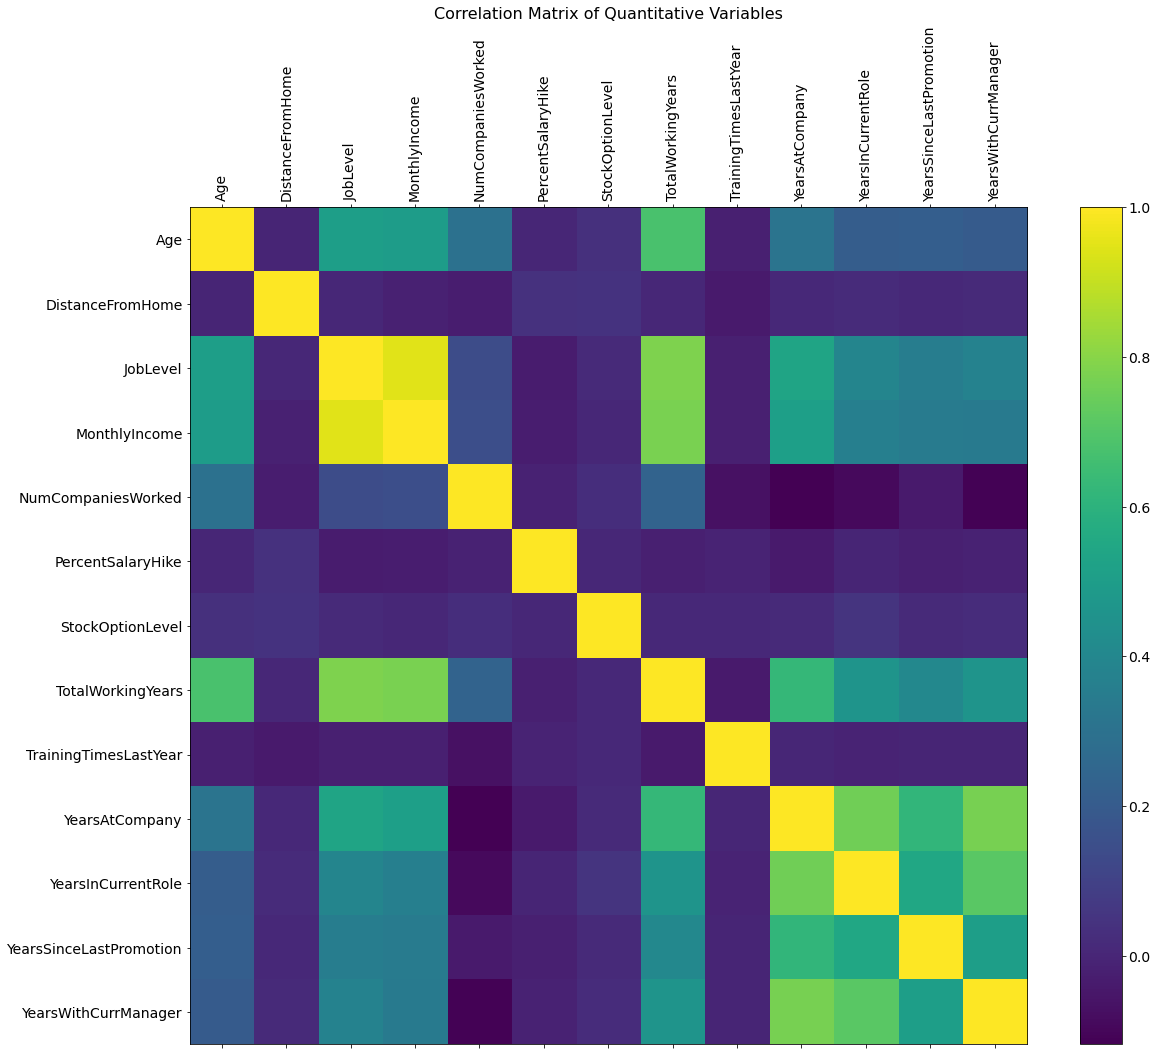

In [19]:
corr = hr.select_dtypes('number')
create_corr_matrix(df=corr, title='Correlation Matrix of Quantitative Variables')

In [20]:
num = corr[['Age', 'JobLevel', 'TotalWorkingYears', 'MonthlyIncome', 
      'YearsAtCompany', 'YearsInCurrentRole', 
      'YearsSinceLastPromotion', 'YearsWithCurrManager']].corr()

num.to_csv('../data/num_corr.csv', index=True)

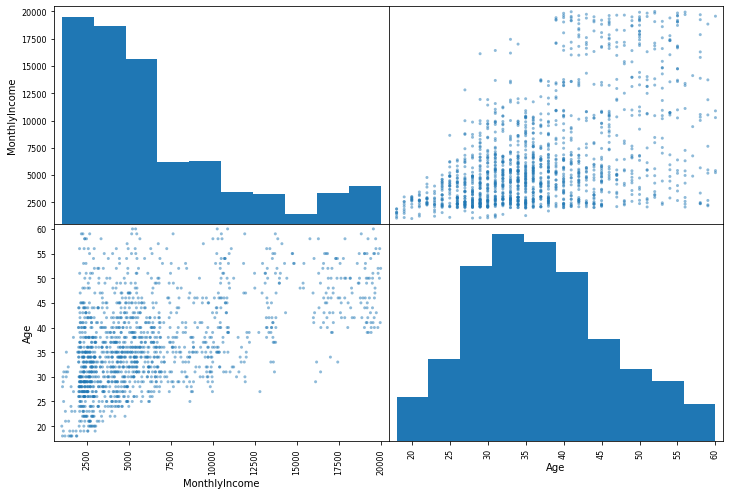

In [21]:
from pandas.plotting import scatter_matrix
attributes = ['MonthlyIncome', 'Age', 'JobSatisfaction']
scatter_matrix(hr[attributes], figsize=(12, 8));

In [22]:
def create_crosstab(data, index, col):
    return pd.crosstab(data[index], data[col])

<a id='section2.2'></a>
### 2.2 - Distribution of Numeric Variables

[back to TOC](#section0)

<AxesSubplot:title={'center':'Department vs Monthly Income vs Attrition'}, xlabel='Department', ylabel='MonthlyIncome'>

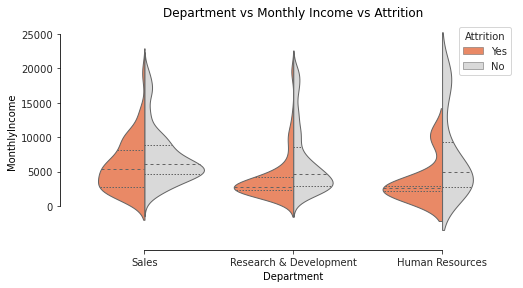

In [23]:
create_violin_plot(data=hr, x='Department', y='MonthlyIncome', hue='Attrition', 
                   title='Department vs Monthly Income vs Attrition', figsize=(8, 4))

<AxesSubplot:title={'center':'Gender vs Monthly Income vs Attrition'}, xlabel='Gender', ylabel='MonthlyIncome'>

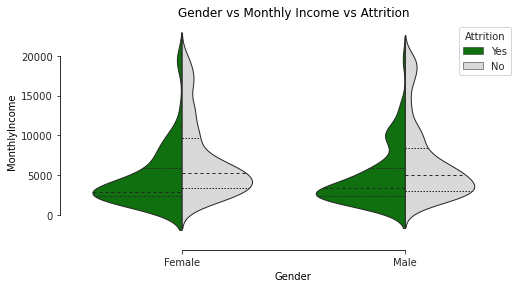

In [24]:
create_violin_plot(data=hr, x='Gender', y='MonthlyIncome', hue='Attrition', 
                   title='Gender vs Monthly Income vs Attrition', figsize=(8, 4),
                   palette={'Yes': 'green'})

<a id='age_numeric'></a>
#### Age

[back to TOC](#section0)

In [25]:
descriptive_stats(data=hr, attr='Age')

,Count,Mean,Std,Min,25%,50%,75%,Max
Yes,237,34,10,18,28,32,39,58
No,"1,233",38,9,18,31,36,43,60
Total,"1,470",37,9,18,30,36,43,60


<AxesSubplot:xlabel='Age', ylabel='Density'>

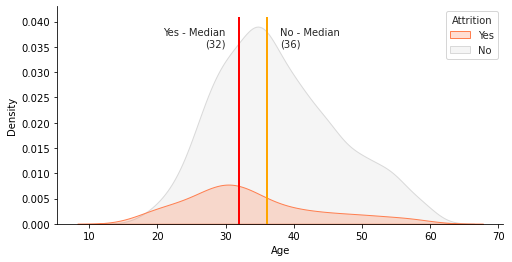

In [26]:
create_kde(data=hr, x='Age', hue='Attrition', 
           palette={'Yes': 'coral'}, vline=True)

<a id='distancefromhome_numeric'></a>
#### Distance from Home

[back to TOC](#section0)

In [27]:
descriptive_stats(data=hr, attr='DistanceFromHome')

,Count,Mean,Std,Min,25%,50%,75%,Max
Yes,237,11,8,1,3,9,17,29
No,"1,233",9,8,1,2,7,13,29
Total,"1,470",9,8,1,2,7,14,29


<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

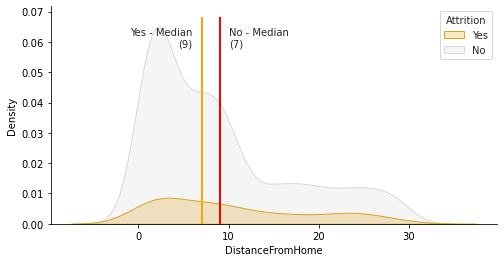

In [28]:
create_kde(data=hr, x='DistanceFromHome', hue='Attrition',
           palette={'Yes': 'goldenrod'}, vline=True, 
           vline_offset=3)

<a id='monthlyincome_numeric'></a>
#### Monthly Income

[back to TOC](#section0)

In [29]:
descriptive_stats(data=hr, attr='MonthlyIncome')

,Count,Mean,Std,Min,25%,50%,75%,Max
Yes,237,"4,787","3,640","1,009","2,373","3,202","5,916","19,859"
No,"1,233","6,833","4,818","1,051","3,211","5,204","8,834","19,999"
Total,"1,470","6,503","4,708","1,009","2,911","4,919","8,379","19,999"


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

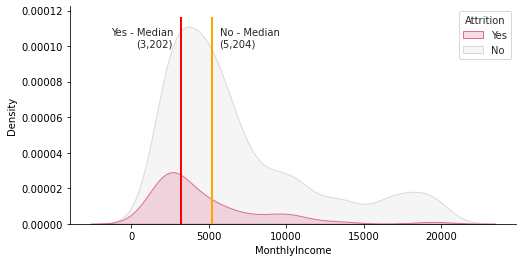

In [30]:
create_kde(data=hr, x='MonthlyIncome', hue='Attrition',
           palette={'Yes': 'palevioletred'}, vline=True, 
           vline_offset=500)

<a id='num_co_worked'></a>
#### Number of Companies Worked

[back to TOC](#section0)

In [31]:
descriptive_stats(data=hr, attr='NumCompaniesWorked')

,Count,Mean,Std,Min,25%,50%,75%,Max
Yes,237,3,3,0,1,1,5,9
No,"1,233",3,2,0,1,2,4,9
Total,"1,470",3,2,0,1,2,4,9


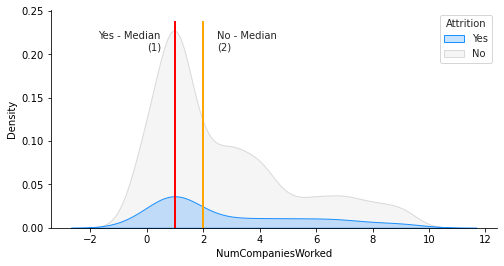

In [32]:
ax = create_kde(data=hr, x='NumCompaniesWorked', hue='Attrition', 
                palette={'Yes': 'dodgerblue'}, vline=True, 
                vline_offset=.5)

<a id='per_salary_hike'></a>
#### Percent Salary Hike

[back to TOC](#section0)

In [33]:
descriptive_stats(data=hr, attr='PercentSalaryHike')

,Count,Mean,Std,Min,25%,50%,75%,Max
Yes,237,15,4,11,12,14,17,25
No,"1,233",15,4,11,12,14,18,25
Total,"1,470",15,4,11,12,14,18,25


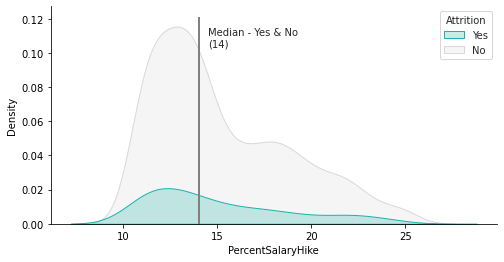

In [34]:
ax = create_kde(data=hr, x='PercentSalaryHike', hue='Attrition', 
                palette={'Yes': 'lightseagreen'}, vline=True, 
                vline_offset=.5)

<a id='training_time_last_year'></a>
#### Training Time Last Year

[back to TOC](#section0)

In [35]:
descriptive_stats(data=hr, attr='TrainingTimesLastYear')

,Count,Mean,Std,Min,25%,50%,75%,Max
Yes,237,3,1,0,2,2,3,6
No,"1,233",3,1,0,2,3,3,6
Total,"1,470",3,1,0,2,3,3,6


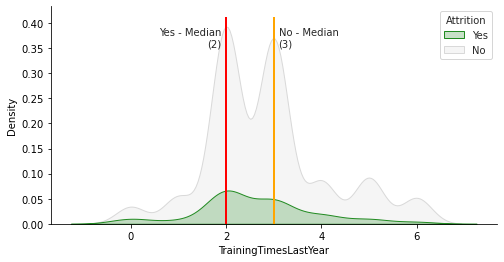

In [36]:
ax = create_kde(data=hr, x='TrainingTimesLastYear', hue='Attrition', 
                palette={'Yes': 'forestgreen'}, vline=True, 
                vline_offset=.1)

<a id='total_yrs_working'></a>
#### Total Years Working

[back to TOC](#section0)

In [37]:
descriptive_stats(data=hr, attr='TotalWorkingYears')

,Count,Mean,Std,Min,25%,50%,75%,Max
Yes,237,8,7,0,3,7,10,40
No,"1,233",12,8,0,6,10,16,38
Total,"1,470",11,8,0,6,10,15,40


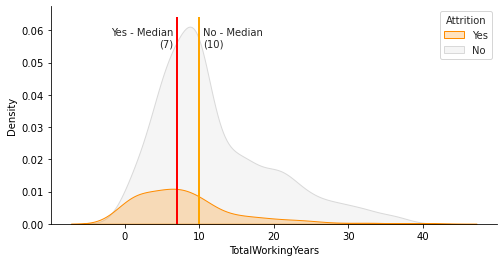

In [38]:
ax = create_kde(data=hr, x='TotalWorkingYears', hue='Attrition', 
                palette={'Yes': 'darkorange'}, vline=True, 
                vline_offset=.5)

<a id='years_at_company'></a>
#### Years at Company

[back to TOC](#section0)

In [39]:
descriptive_stats(data=hr, attr='YearsAtCompany')

,Count,Mean,Std,Min,25%,50%,75%,Max
Yes,237,5,6,0,1,3,7,40
No,"1,233",7,6,0,3,6,10,37
Total,"1,470",7,6,0,3,5,9,40


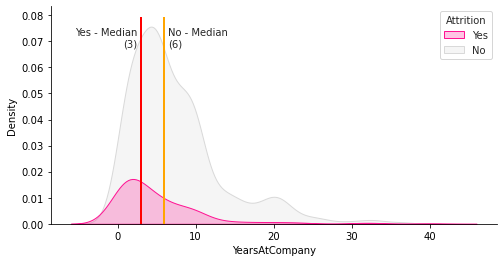

In [40]:
ax = create_kde(data=hr, x='YearsAtCompany', hue='Attrition', 
                palette={'Yes': 'deeppink'}, vline=True, vline_offset=.5)

In [41]:
bin_labels = ['0 - 3', '4 - 5', '6 - 9', '10+']
hr['YearsAtCo_Bins'] = pd.qcut(hr['YearsAtCompany'], q=[0, .25, .5, .75, 1], labels=bin_labels)

In [42]:
hr.loc[pd.isnull(hr['YearsAtCo_Bins']), ['YearsAtCompany', 'YearsAtCo_Bins']]

,YearsAtCompany,YearsAtCo_Bins


In [43]:
(pd.crosstab(hr['Attrition'], 
            hr['YearsAtCo_Bins']).T
    .assign(Perc_Yes = lambda x: x['Yes']/x.sum(axis=1) * 100).round(1)
    .assign(Perc_No = lambda x: x['No']/x.sum(axis=1) * 100).round(1)
)[['Perc_Yes', 'Perc_No']]

Attrition,Perc_Yes,Perc_No
YearsAtCo_Bins,,
0 - 3,26.0,70.2
4 - 5,13.1,83.4
6 - 9,11.3,85.8
10+,10.4,87.1


<a id='years_since_last_promo'></a>
#### Years Since Last Promotion

[back to TOC](#section0)

In [44]:
descriptive_stats(data=hr, attr='YearsSinceLastPromotion')

,Count,Mean,Std,Min,25%,50%,75%,Max
Yes,237,2,3,0,0,1,2,15
No,"1,233",2,3,0,0,1,3,15
Total,"1,470",2,3,0,0,1,3,15


<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

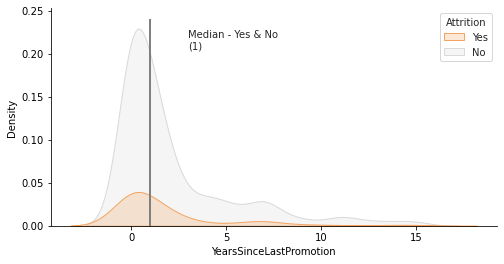

In [45]:
create_kde(data=hr, x='YearsSinceLastPromotion', hue='Attrition', 
           palette={'Yes': 'sandybrown'}, vline=True, 
           vline_offset=2)

In [46]:
# bin_labels = ['0 - 1', '2 - 3', '4 - 5', '6 - 10', '10+']
# bins=[-1, 1, 3, 5, 10, 15]
bin_labels = ['0 - 1', '2 - 5', '6 - 10', '10+']
hr['YearsLastPromo_Bins'] = pd.cut(hr['YearsSinceLastPromotion'], 
                                   bins=[-1, 1, 5, 10, 15], 
                                   labels=bin_labels)

In [47]:
hr.loc[pd.isnull(hr['YearsLastPromo_Bins']), ['YearsSinceLastPromotion', 'YearsLastPromo_Bins']]

,YearsSinceLastPromotion,YearsLastPromo_Bins


In [48]:
(pd.crosstab(hr['YearsLastPromo_Bins'], hr['Attrition'])
    .assign(Perc_Yes = lambda x: x['Yes']/x.sum(axis=1) * 100).round(1)
    .assign(Perc_No = lambda x: x['No']/x.sum(axis=1) * 100).round(1)
)[['Perc_Yes', 'Perc_No']]

Attrition,Perc_Yes,Perc_No
YearsLastPromo_Bins,,
0 - 1,17.0,81.6
2 - 5,13.6,82.9
6 - 10,18.1,73.0
10+,12.1,74.3


<a id='yrs_in_curr_role'></a>
#### Years in Current Role

[back to TOC](#section0)

In [49]:
descriptive_stats(data=hr, attr='YearsInCurrentRole')

,Count,Mean,Std,Min,25%,50%,75%,Max
Yes,237,3,3,0,0,2,4,15
No,"1,233",4,4,0,2,3,7,18
Total,"1,470",4,4,0,2,3,7,18


<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Density'>

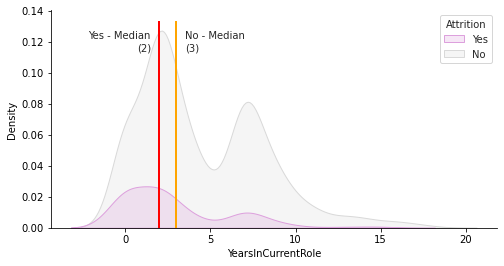

In [50]:
create_kde(data=hr, x='YearsInCurrentRole', hue='Attrition', 
           palette={'Yes': 'plum'}, vline=True, 
           vline_offset=.5)

<a id='years_with_curr_mgr'></a>
#### Years With Current Manager

[back to TOC](#section0)

In [51]:
descriptive_stats(data=hr, attr='YearsWithCurrManager')

,Count,Mean,Std,Min,25%,50%,75%,Max
Yes,237,3,3,0,0,2,5,14
No,"1,233",4,4,0,2,3,7,17
Total,"1,470",4,4,0,2,3,7,17


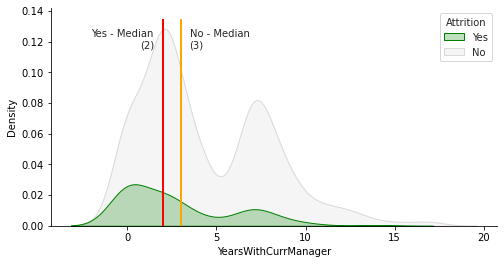

In [52]:
ax = create_kde(data=hr, x='YearsWithCurrManager', hue='Attrition', 
                palette={'Yes': 'green'}, vline=True, 
                vline_offset=.5)

<a id='section2.3'></a>
### 2.3 - Distribution of Categorical Variables

[back to TOC](#section0)

<a id='functiondef'></a><h4>Function Definitions</h4>

In [53]:
def create_countplot(data, x, hue, figsize=(8, 4), 
                     style='whitegrid', 
                     x_label=None, y_label=None,
                     palette={'Yes': 'lightseagreen'},
                     show_value_labels=True,
                     v_value_label_offset=1,
                     h_value_label_offset=0.4,
                     legend_loc='upper right',
                     orient='v', dodge=True):
    
    with sns.axes_style(style=style):
        f, ax = plt.subplots(figsize=figsize)
        
        plotting_kwargs = dict(
            hue=hue, data=data, ax=ax, 
            palette={**{'No': '.85'}, **palette},
            lw=.5, edgecolor='black', saturation=1,
            dodge=dodge
        )
        
        if orient == 'v':
            plotting_kwargs['x'] = x
            ax = sns.countplot(**plotting_kwargs);
        else:
            plotting_kwargs['y'] = x
            ax = sns.countplot(**plotting_kwargs);
            
        sns.despine()
        if x_label is not None:
            ax.set_xlabel(x_label)
            ax.set_ylabel('Count')
            
        if y_label is not None:
            ax.set_xlabel('Count')
            ax.set_ylabel(y_label)        
        
        plt.legend(loc=legend_loc)
          
        if show_value_labels:
            show_values_on_bars(ax, orient, h_value_label_offset, v_value_label_offset)         
    return ax

def show_values_on_bars(ax, orient, h_value_label_offset, v_value_label_offset):
    # https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values    
    if orient == 'v':
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + v_value_label_offset
            value = 0 if (np.isnan(p.get_height())) else int(p.get_height())
            ax.text(_x, _y, value, ha='center', va='center') 
    elif orient == 'h':
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(h_value_label_offset)
            _y = p.get_y() + p.get_height() / 2
            value = 0 if (np.isnan(p.get_width())) else int(p.get_width())
            ax.text(_x, _y, value, ha='left', va='center')
        
def create_crosstab(data, index, col):
    df = (pd.crosstab(data[index], hr[col])
            .assign(Perc_Yes = lambda x: x['Yes']/x.sum(axis=1) * 100).round(1)
            .assign(Perc_No = lambda x: x['No']/x.sum(axis=1) * 100).round(1)
        )[['Yes', 'No', 'Perc_Yes', 'Perc_No']]
    return df

<a id='age'></a>
#### Age

[back to TOC](#section0)

In [54]:
descriptive_stats(data=hr, attr='Age')

,Count,Mean,Std,Min,25%,50%,75%,Max
Yes,237,34,10,18,28,32,39,58
No,"1,233",38,9,18,31,36,43,60
Total,"1,470",37,9,18,30,36,43,60


In [55]:
cut_bins = [17, 29, 39, 49, 59, 60]
cut_labels = ['18 - 29', '30 - 39', '40 - 49', '50 - 60', '60+']
hr['Age_Bins'] = pd.cut(hr['Age'], bins=cut_bins, labels=cut_labels)

In [56]:
t = (pd.crosstab(hr['Attrition'], hr['Age_Bins'])
         .T.reset_index(drop=False)
         .melt(id_vars=['Age_Bins'], 
               value_vars=['No', 'Yes'], 
               value_name='Count'))
t

,Age_Bins,Attrition,Count
0,18 - 29,No,235
1,30 - 39,No,533
2,40 - 49,No,315
3,50 - 60,No,145
4,60+,No,5
5,18 - 29,Yes,91
6,30 - 39,Yes,89
7,40 - 49,Yes,34
8,50 - 60,Yes,23
9,60+,Yes,0


In [57]:
create_crosstab(data=hr, index='Age_Bins', col='Attrition')

Attrition,Yes,No,Perc_Yes,Perc_No
Age_Bins,,,,
18 - 29,91,235,27.9,66.4
30 - 39,89,533,14.3,83.8
40 - 49,34,315,9.7,87.8
50 - 60,23,145,13.7,79.8
60+,0,5,0.0,100.0


<AxesSubplot:xlabel='Age', ylabel='Count'>

posx and posy should be finite values
posx and posy should be finite values


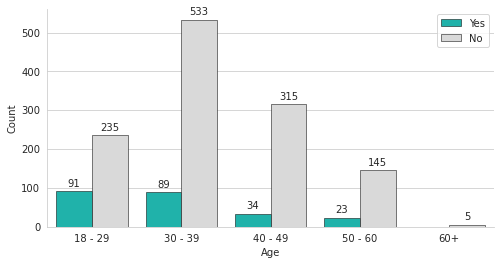

In [58]:
create_countplot(data=hr, x='Age_Bins', 
                 hue='Attrition', 
                 palette={'Yes': 'lightseagreen'},
                 x_label='Age', show_value_labels=True,
                 orient='v', v_value_label_offset=20)

<AxesSubplot:xlabel='Count', ylabel='Age'>

posx and posy should be finite values
posx and posy should be finite values


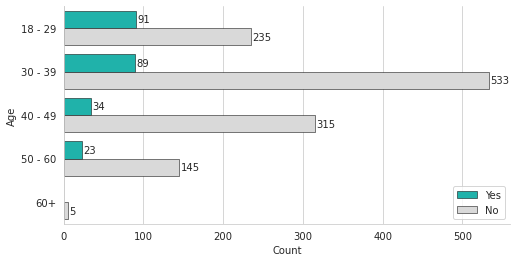

In [59]:
create_countplot(data=hr, x='Age_Bins', 
                 hue='Attrition', 
                 palette={'Yes': 'lightseagreen'},
                 y_label='Age', show_value_labels=True,
                 orient='h', h_value_label_offset=2,
                 legend_loc='lower right')

<a id='businesstravel'></a> <h4>Business Travel</h4>

[back to TOC](#section0)

In [60]:
create_crosstab(data=hr, index='BusinessTravel', col='Attrition')

Attrition,Yes,No,Perc_Yes,Perc_No
BusinessTravel,,,,
Non-Travel,12,138,8.0,87.3
Travel_Rarely,156,887,15.0,83.8
Travel_Frequently,69,208,24.9,68.9


<AxesSubplot:xlabel='Business Travel', ylabel='Count'>

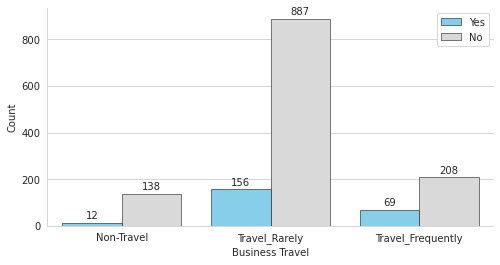

In [61]:
create_countplot(data=hr, x='BusinessTravel', 
                 hue='Attrition', 
                 palette={'Yes': 'skyblue'},
                 x_label='Business Travel', 
                 show_value_labels=True,
                 orient='v', v_value_label_offset=30)

<a id='department'></a>
#### Department

[back to TOC](#section0)

In [62]:
create_crosstab(data=hr, index='Department', col='Attrition')

Attrition,Yes,No,Perc_Yes,Perc_No
Department,,,,
Human Resources,12,51,19.0,62.2
Research & Development,133,828,13.8,84.9
Sales,92,354,20.6,75.9


<AxesSubplot:xlabel='Department', ylabel='Count'>

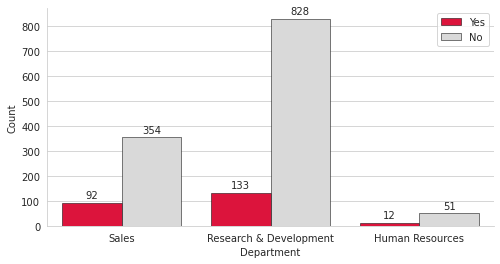

In [63]:
create_countplot(data=hr, x='Department', 
                 hue='Attrition', 
                 palette={'Yes': 'crimson'},
                 x_label='Department', 
                 show_value_labels=True,
                 orient='v', v_value_label_offset=30)

<a id='monthly income'></a>
#### Monthly Income

[back to TOC](#section0)

In [64]:
descriptive_stats(data=hr, attr='MonthlyIncome')

,Count,Mean,Std,Min,25%,50%,75%,Max
Yes,237,"4,787","3,640","1,009","2,373","3,202","5,916","19,859"
No,"1,233","6,833","4,818","1,051","3,211","5,204","8,834","19,999"
Total,"1,470","6,503","4,708","1,009","2,911","4,919","8,379","19,999"


In [65]:
bin_labels = ['\$1,000 - \$2,999', '\$3,000 - \$4,999', 
              '\$5,000 - \$8,499', '\$8,500 - \$19,999']
bins = [0, 2999, 4999, 8499, 19999]
hr['MonthlyIncome_Bins'] = pd.cut(hr['MonthlyIncome'], bins=bins, labels=bin_labels)

In [66]:
create_crosstab(data=hr, index='MonthlyIncome_Bins', col='Attrition')

Attrition,Yes,No,Perc_Yes,Perc_No
MonthlyIncome_Bins,,,,
"\$1,000 - \$2,999",113,282,28.6,66.6
"\$3,000 - \$4,999",50,304,14.1,82.6
"\$5,000 - \$8,499",37,324,10.2,87.3
"\$8,500 - \$19,999",37,323,10.3,87.2


<AxesSubplot:xlabel='Monthly Income Categories', ylabel='Count'>

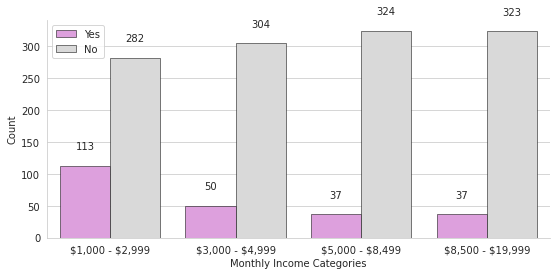

In [67]:
create_countplot(data=hr, x='MonthlyIncome_Bins', 
                 hue='Attrition', 
                 palette={'Yes': 'plum'},
                 x_label='Monthly Income Categories', 
                 show_value_labels=True,
                 figsize=(9, 4),
                 legend_loc='upper left',
                 orient='v', v_value_label_offset=30,)

<a id='years at company'></a>
#### Years at Company

[back to TOC](#section0)

In [68]:
descriptive_stats(data=hr, attr='YearsAtCompany')

,Count,Mean,Std,Min,25%,50%,75%,Max
Yes,237,5,6,0,1,3,7,40
No,"1,233",7,6,0,3,6,10,37
Total,"1,470",7,6,0,3,5,9,40


In [69]:
bin_labels = ['0 - 3', '4 - 5', '6 - 9', '10+']
hr['YearsAtCo_Bins'] = pd.qcut(hr['YearsAtCompany'], q=[0, .25, .5, .75, 1], labels=bin_labels)

In [70]:
create_crosstab(data=hr, index='YearsAtCo_Bins', col='Attrition')

Attrition,Yes,No,Perc_Yes,Perc_No
YearsAtCo_Bins,,,,
0 - 3,122,348,26.0,70.2
4 - 5,40,266,13.1,83.4
6 - 9,37,291,11.3,85.8
10+,38,328,10.4,87.1


<AxesSubplot:xlabel='Years at Company', ylabel='Count'>

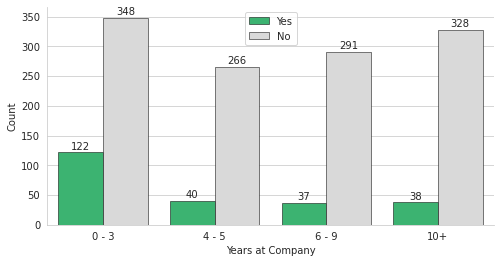

In [71]:
create_countplot(data=hr, x='YearsAtCo_Bins', 
                 hue='Attrition', 
                 palette={'Yes': 'mediumseagreen'},
                 x_label='Years at Company', 
                 show_value_labels=True,
                 orient='v', v_value_label_offset=10,
                 legend_loc='upper center')

<a id='distancefromhome'></a>
#### Distance from Home

[back to TOC](#section0)

In [72]:
descriptive_stats(data=hr, attr='DistanceFromHome')

,Count,Mean,Std,Min,25%,50%,75%,Max
Yes,237,11,8,1,3,9,17,29
No,"1,233",9,8,1,2,7,13,29
Total,"1,470",9,8,1,2,7,14,29


In [73]:
bin_labels = ['0 - 2', '3 - 7', '8 - 14', '15+']
hr['DistanceFromHome_Bin'] = pd.qcut(hr['DistanceFromHome'], 
                                     q=[0, .25, .5, .75, 1],
                                     labels=bin_labels)

In [74]:
create_crosstab(data=hr, index='DistanceFromHome_Bin', col='Attrition')

Attrition,Yes,No,Perc_Yes,Perc_No
DistanceFromHome_Bin,,,,
0 - 2,54,365,12.9,84.5
3 - 7,51,305,14.3,82.4
8 - 14,59,281,17.4,78.6
15+,73,282,20.6,75.1


<AxesSubplot:xlabel='Distance from Home Categories', ylabel='Count'>

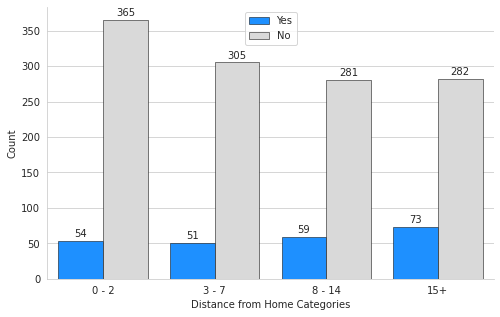

In [75]:
create_countplot(data=hr, x='DistanceFromHome_Bin', 
                 hue='Attrition', 
                 palette={'Yes': 'dodgerblue'},
                 x_label='Distance from Home Categories', 
                 show_value_labels=True,
                 orient='v', v_value_label_offset=10,
                 style='whitegrid',
                 figsize=(8, 5),
                 legend_loc='upper center')

<a id='education'></a>
#### Education

[back to TOC](#section0)

In [76]:
create_crosstab(data=hr, index='Education', col='Attrition')

Attrition,Yes,No,Perc_Yes,Perc_No
Education,,,,
Below College,31,139,18.2,73.9
College,44,238,15.6,80.0
Bachelor,99,473,17.3,80.3
Master,58,340,14.6,82.4
Doctor,5,43,10.4,73.6


<AxesSubplot:xlabel='Count', ylabel='Education'>

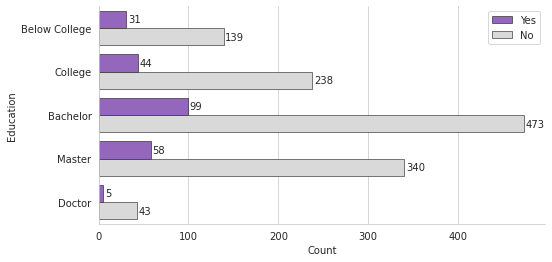

In [77]:
create_countplot(data=hr, x='Education', 
                 hue='Attrition', 
                 palette={'Yes': 'tab:purple'},
                 y_label='Education', 
                 show_value_labels=True,
                 orient='h', h_value_label_offset=2,
                 style='whitegrid',
                 legend_loc='upper right')

<a id='educationfield'></a>
#### Education Field

[back to TOC](#section0)

In [78]:
create_crosstab(data=hr, index='EducationField', col='Attrition')

Attrition,Yes,No,Perc_Yes,Perc_No
EducationField,,,,
Human Resources,7,20,25.9,37.8
Life Sciences,89,517,14.7,83.3
Marketing,35,124,22.0,68.5
Medical,63,401,13.6,84.0
Other,11,71,13.4,74.4
Technical Degree,32,100,24.2,64.0


<AxesSubplot:xlabel='Count', ylabel='Education'>

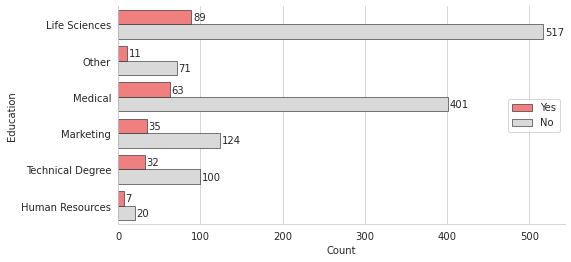

In [79]:
create_countplot(data=hr, x='EducationField', 
                 hue='Attrition', 
                 palette={'Yes': 'lightcoral'},
                 y_label='Education', 
                 show_value_labels=True,
                 orient='h', h_value_label_offset=2,
                 style='whitegrid',
                 legend_loc='center right')

<a id='environmentsatisfaction'></a>
#### Environment Satisfaction

[back to TOC](#section0)

In [80]:
create_crosstab(data=hr, index='EnvironmentSatisfaction', col='Attrition')

Attrition,Yes,No,Perc_Yes,Perc_No
EnvironmentSatisfaction,,,,
Low,72,212,25.4,68.5
Medium,43,244,15.0,80.8
High,62,391,13.7,83.8
Very High,60,386,13.5,84.0


<AxesSubplot:xlabel='Count', ylabel='Environment Satisfaction Score'>

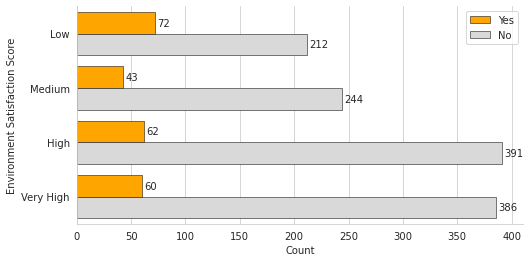

In [81]:
create_countplot(data=hr, x='EnvironmentSatisfaction', 
                 hue='Attrition', 
                 palette={'Yes': 'orange'},
                 y_label='Environment Satisfaction Score', 
                 show_value_labels=True,
                 orient='h', h_value_label_offset=2,
                 style='whitegrid',
                 legend_loc='upper right')

<a id='gender'></a>
#### Gender

[back to TOC](#section0)

In [82]:
create_crosstab(data=hr, index='Gender', col='Attrition')

Attrition,Yes,No,Perc_Yes,Perc_No
Gender,,,,
Female,87,501,14.8,83.1
Male,150,732,17.0,81.4


<AxesSubplot:xlabel='Gender', ylabel='Count'>

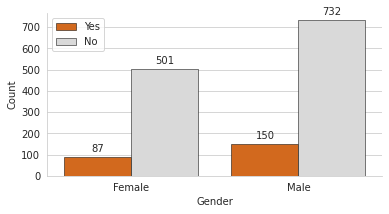

In [83]:
create_countplot(data=hr, x='Gender', 
                 hue='Attrition', 
                 palette={'Yes': 'chocolate'},
                 x_label='Gender', 
                 show_value_labels=True,
                 orient='v', v_value_label_offset=40,
                 style='whitegrid',
                 figsize=(6, 3),
                 legend_loc='upper left')

<a id='jobinvolvement'></a>
#### Job Involvement

[back to TOC](#section0)

In [84]:
create_crosstab(data=hr, index='JobInvolvement', col='Attrition')

Attrition,Yes,No,Perc_Yes,Perc_No
JobInvolvement,,,,
Low,28,55,33.7,47.1
Medium,71,304,18.9,77.2
High,125,743,14.4,84.2
Very High,13,131,9.0,85.6


<AxesSubplot:xlabel='Count', ylabel='Job Involvement'>

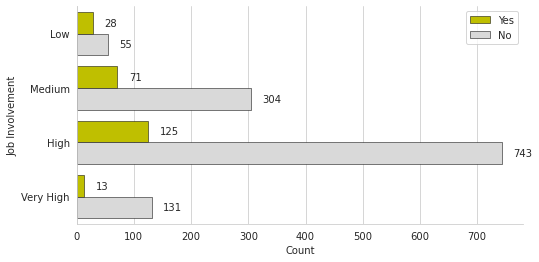

In [85]:
create_countplot(data=hr, x='JobInvolvement', 
                 hue='Attrition', 
                 palette={'Yes': 'y'},
                 y_label='Job Involvement', 
                 show_value_labels=True,
                 orient='h', h_value_label_offset=20,
                 style='whitegrid',
                 legend_loc='upper right')

<a id='joblevel'></a>
#### Job Level

[back to TOC](#section0)

In [86]:
create_crosstab(data=hr, index='JobLevel', col='Attrition')

Attrition,Yes,No,Perc_Yes,Perc_No
JobLevel,,,,
1,143,400,26.3,70.3
2,52,482,9.7,88.7
3,32,186,14.7,79.9
4,5,101,4.7,91.2
5,5,64,7.2,84.0


<AxesSubplot:xlabel='Count', ylabel='Job Level'>

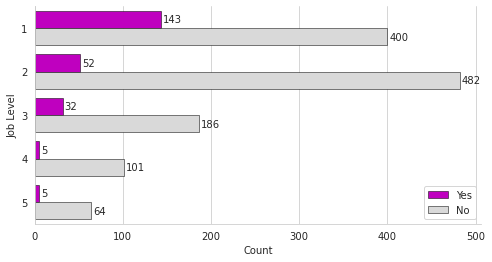

In [87]:
create_countplot(data=hr, x='JobLevel', 
                 hue='Attrition', 
                 palette={'Yes': 'm'},
                 y_label='Job Level', 
                 show_value_labels=True,
                 orient='h', h_value_label_offset=2,
                 style='whitegrid',
                 legend_loc='lower right')

<a id='jobrole'></a>
#### Job Role

[back to TOC](#section0)

In [88]:
create_crosstab(data=hr, index='JobRole', col='Attrition')

Attrition,Yes,No,Perc_Yes,Perc_No
JobRole,,,,
Healthcare Representative,9,122,6.9,88.5
Human Resources,12,40,23.1,53.3
Laboratory Technician,62,197,23.9,69.6
Manager,5,97,4.9,90.7
Manufacturing Director,10,135,6.9,88.9
Research Director,2,78,2.5,94.5
Research Scientist,47,245,16.1,79.5
Sales Executive,57,269,17.5,78.3
Sales Representative,33,50,39.8,40.7


<AxesSubplot:xlabel='Count', ylabel='Job Role'>

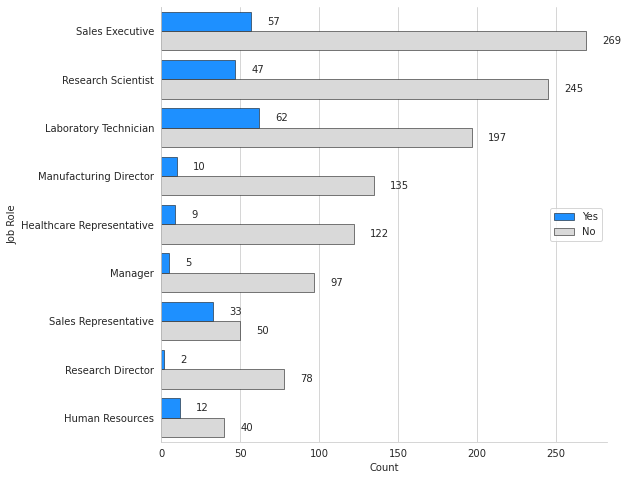

In [89]:
create_countplot(data=hr, x='JobRole', 
                 hue='Attrition', 
                 palette={'Yes': 'dodgerblue'},
                 y_label='Job Role', 
                 show_value_labels=True,
                 orient='h', h_value_label_offset=10,
                 legend_loc='center right',
                 figsize=(8, 8))

<a id='jobsatisfaction'></a>
#### Job Satisfaction

[back to TOC](#section0)

In [90]:
create_crosstab(data=hr, index='JobSatisfaction', col='Attrition')

Attrition,Yes,No,Perc_Yes,Perc_No
JobSatisfaction,,,,
Low,66,223,22.8,71.5
Medium,46,234,16.4,78.9
High,73,369,16.5,80.5
Very High,52,407,11.3,86.5


<AxesSubplot:xlabel='Count', ylabel='Job Level'>

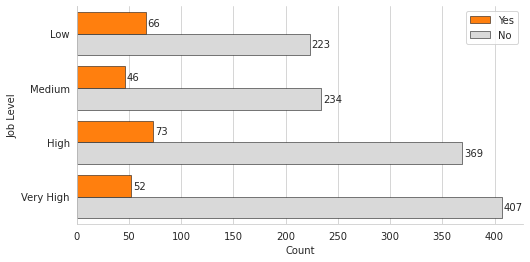

In [91]:
create_countplot(data=hr, x='JobSatisfaction', 
                 hue='Attrition', 
                 palette={'Yes': 'tab:orange'},
                 y_label='Job Level', 
                 show_value_labels=True,
                 orient='h', h_value_label_offset=2,
                 style='whitegrid',
                 legend_loc='upper right')

<a id='maritalstatus'> </a>
#### Marital Status

[back to TOC](#section0)

In [92]:
create_crosstab(data=hr, index='MaritalStatus', col='Attrition')

Attrition,Yes,No,Perc_Yes,Perc_No
MaritalStatus,,,,
Divorced,33,294,10.1,87.2
Married,84,589,12.5,85.9
Single,120,350,25.5,70.6


<AxesSubplot:xlabel='Marital Status', ylabel='Count'>

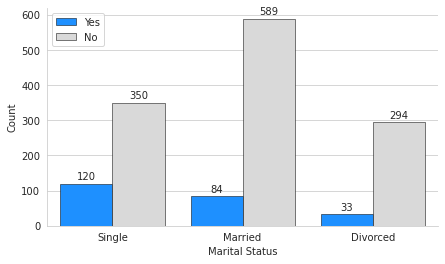

In [93]:
create_countplot(data=hr, x='MaritalStatus', 
                 hue='Attrition', 
                 palette={'Yes': 'dodgerblue'},
                 x_label='Marital Status', 
                 show_value_labels=True,
                 orient='v', v_value_label_offset=20,
                 style='whitegrid',
                 legend_loc='upper left',
                 figsize=(7, 4))

<a id='overtime'></a>
#### Overtime

[back to TOC](#section0)

In [94]:
create_crosstab(data=hr, index='OverTime', col='Attrition')

Attrition,Yes,No,Perc_Yes,Perc_No
OverTime,,,,
No,110,944,10.4,88.7
Yes,127,289,30.5,64.7


<AxesSubplot:xlabel='Overtime', ylabel='Count'>

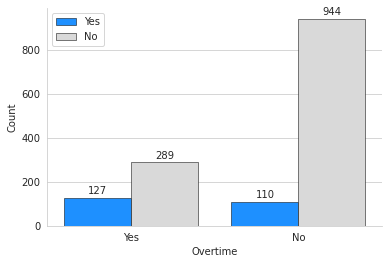

In [95]:
create_countplot(data=hr, x='OverTime', 
                 hue='Attrition', 
                 palette={'Yes': 'dodgerblue'},
                 x_label='Overtime', 
                 show_value_labels=True,
                 orient='v', v_value_label_offset=30,
                 style='whitegrid',
                 legend_loc='upper left',
                 figsize=(6, 4))

<a id='performancerating'></a>
#### Performance Rating

[back to TOC](#section0)

In [96]:
create_crosstab(data=hr, index='PerformanceRating', col='Attrition')

Attrition,Yes,No,Perc_Yes,Perc_No
PerformanceRating,,,,
Excellent,200,1044,16.1,82.9
Outstanding,37,189,16.4,78.0


<AxesSubplot:xlabel='Performance Rating', ylabel='Count'>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


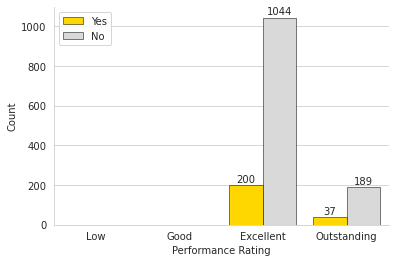

In [97]:
create_countplot(data=hr, x='PerformanceRating', 
                 hue='Attrition', 
                 palette={'Yes': 'gold'},
                 x_label='Performance Rating', 
                 show_value_labels=True,
                 orient='v', v_value_label_offset=30,
                 style='whitegrid',
                 legend_loc='upper left',
                 figsize=(6, 4))

<a id='relationshipsatisfaction'></a>
#### Relationship Satisfaction

[back to TOC](#section0)

In [98]:
create_crosstab(data=hr, index='RelationshipSatisfaction', col='Attrition')

Attrition,Yes,No,Perc_Yes,Perc_No
RelationshipSatisfaction,,,,
Low,57,219,20.7,73.8
Medium,45,258,14.9,81.2
High,71,388,15.5,81.8
Very High,64,368,14.8,82.4


<AxesSubplot:xlabel='Count', ylabel='Job Level'>

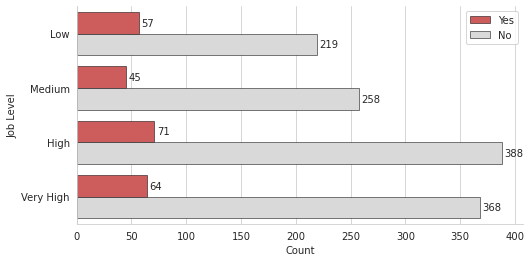

In [99]:
create_countplot(data=hr, x='RelationshipSatisfaction', 
                 hue='Attrition', 
                 palette={'Yes': 'indianred'},
                 y_label='Job Level', 
                 show_value_labels=True,
                 orient='h', h_value_label_offset=2,
                 style='whitegrid',
                 legend_loc='upper right')

<a id='stock_option_level'></a>
#### Stock Option Level

[back to TOC](#section0)

In [100]:
create_crosstab(data=hr, index='StockOptionLevel', col='Attrition')

Attrition,Yes,No,Perc_Yes,Perc_No
StockOptionLevel,,,,
0,154,477,24.4,72.8
1,56,540,9.4,89.2
2,12,146,7.6,88.2
3,15,70,17.6,68.2


<AxesSubplot:xlabel='Count', ylabel='Stock Option Level'>

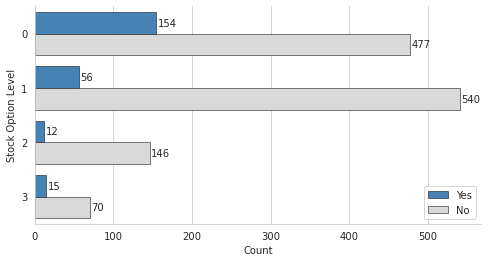

In [101]:
create_countplot(data=hr, x='StockOptionLevel', 
                 hue='Attrition', 
                 palette={'Yes': 'steelblue'},
                 y_label='Stock Option Level', 
                 show_value_labels=True,
                 orient='h', h_value_label_offset=2,
                 style='whitegrid',
                 legend_loc='lower right')

<a id='worklifebalance'></a>
#### Work Life Balance

[back to TOC](#section0)

In [102]:
create_crosstab(data=hr, index='WorkLifeBalance', col='Attrition')

Attrition,Yes,No,Perc_Yes,Perc_No
WorkLifeBalance,,,,
Bad,25,55,31.2,49.5
Good,58,286,16.9,79.2
Better,127,766,14.2,84.4
Best,27,126,17.6,73.9


<AxesSubplot:xlabel='Count', ylabel='Stock Option Level'>

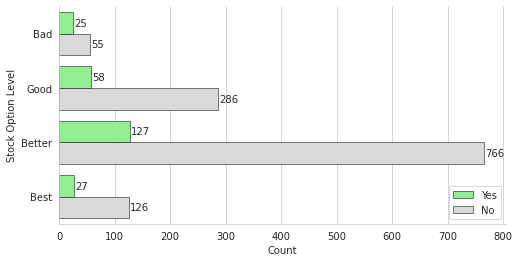

In [103]:
create_countplot(data=hr, x='WorkLifeBalance', 
                 hue='Attrition', 
                 palette={'Yes': 'lightgreen'},
                 y_label='Stock Option Level', 
                 show_value_labels=True,
                 orient='h', h_value_label_offset=2,
                 style='whitegrid',
                 legend_loc='lower right')

<a id='section3'></a>
## 3.0 - Model Development

[back to TOC](#section0)

<a id='section3.1'></a>
### 3.1 - Pre-Processing for Model Development

[back to TOC](#section0)

In [104]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
ord_encoder = OrdinalEncoder()
cat_encoder = OneHotEncoder()

In [105]:
selected_attributes = [
    'Age', 'Age_Bins', 'MonthlyIncome', 'DistanceFromHome',
    'PercentSalaryHike', 'TrainingTimesLastYear', 'NumCompaniesWorked',
    'YearsAtCompany', 'YearsAtCo_Bins', 'YearsSinceLastPromotion','YearsLastPromo_Bins',
    'YearsInCurrentRole', 'BusinessTravel', 'Department', 'Education', 
    'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole',
    'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating',
    'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance',       
]

In [106]:
num = hr[selected_attributes].select_dtypes(include=['number'])
cat = hr[selected_attributes].select_dtypes(include=['category'])
obj = hr[selected_attributes].select_dtypes(include=['object'])

In [206]:
cat.columns.sort_values()

Index(['Age_Bins', 'BusinessTravel', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'PerformanceRating',
       'RelationshipSatisfaction', 'WorkLifeBalance', 'YearsAtCo_Bins',
       'YearsLastPromo_Bins'],
      dtype='object')

In [188]:
num.columns

Index(['Age', 'MonthlyIncome', 'DistanceFromHome', 'PercentSalaryHike',
       'TrainingTimesLastYear', 'NumCompaniesWorked', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsInCurrentRole', 'StockOptionLevel'],
      dtype='object')

In [191]:
obj.columns

Index(['Department', 'JobRole', 'MaritalStatus', 'OverTime'], dtype='object')

In [201]:
cat_cols.shape

(1470, 11)

In [207]:
obj_cols.shape

(1470, 17)

In [204]:
cat_cols = ord_encoder.fit_transform(cat[['Age_Bins']])
for col in cat.columns.sort_values()[1:]:
    cat_cols = np.concatenate(
        (cat_cols, ord_encoder.fit_transform(cat[[col]])), 
        axis=1)

In [208]:
obj_cols = cat_encoder.fit_transform(obj[['Department']]).toarray()
for col in obj.columns.sort_values()[1:]:
    obj_cols = np.concatenate(
        (obj_cols, cat_encoder.fit_transform(obj[[col]]).toarray()), 
        axis=1)

In [161]:
X_df = pd.concat([obj, cat, num], axis=1)

In [196]:
X = np.concatenate((obj_cols, cat_cols, num), axis=1)
y = hr['Attrition'].map({'Yes': 1, 'No': 0}).values
feature_names = obj.columns.sort_values().to_list() + cat.columns.sort_values().to_list() + num.columns.sort_values().to_list()

In [197]:
print(cat_cols.shape)
print(obj_cols.shape)
print(num.shape)
print(y.shape)
print(X.shape)
print(X_df.shape)

(1470, 11)
(1470, 17)
(1470, 10)
(1470,)
(1470, 38)
(1470, 25)


In [198]:
feature_names

['Department',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Age_Bins',
 'BusinessTravel',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance',
 'YearsAtCo_Bins',
 'YearsLastPromo_Bins',
 'Age',
 'DistanceFromHome',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion']

<a id='section3.2'></a>
### 3.2 - Create Training and Testing Data Sets

[back to TOC](#section0)

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=0)

#### Feature Scaling

In [114]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id='section3.3'></a>
### 3.3 - Define Functions for Model Creation

[back to TOC](#section0)

In [115]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [132]:
def plot_roc_auc_curve(fpr, tpr, roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
           
def plot_confusion_matrix(cm, cmap='Blues', class_labels=None):
    df_cm = pd.DataFrame(cm.T, index=class_labels, columns=class_labels)
    sns.heatmap(df_cm, square=True, annot=True, fmt='d', cbar=False, 
        cmap=cmap, annot_kws={"size": 12})
    plt.xlabel('True Labels')
    plt.ylabel('Predicted Labels')
    plt.show()
        
def classify(X_train, X_test, y_train, y_test, classifier='log_reg', **kwargs):
    classifier_dict = dict(
        log_reg=LogisticRegression,
        lda=LDA,
        sgd=SGDClassifier,
        nb=GaussianNB,
        svm=SVC,
        tree=DecisionTreeClassifier,
        rfc=RandomForestClassifier,
        gboost=GradientBoostingClassifier,
        xgboost=XGBClassifier,
        knn=KNeighborsClassifier
    )
    if classifier in ('rfc', 'gboost'):
        model = classifier_dict.get(classifier, LogisticRegression)(
            n_estimators=kwargs.get('n_estimators'),
            max_depth=kwargs.get('max_depth'), 
            max_features=kwargs.get('max_features')
        ).fit(X_train, y_train)
        
    if classifier == 'tree':
        model = classifier_dict.get(classifier, LogisticRegression)(
            max_depth=kwargs.get('max_depth'), 
            max_features=kwargs.get('max_features')
        ).fit(X_train, y_train)
        
    if classifier == 'xgboost':
        model = classifier_dict.get(classifier, LogisticRegression)(
            n_estimators=kwargs.get('n_estimators'),
            max_depth=kwargs.get('max_depth'), 
            min_child_weight=kwargs.get('min_child_weight'),
        ).fit(X_train, y_train)
        
    model = classifier_dict.get(classifier, LogisticRegression)().fit(X_train, y_train)
    model_name = model.__class__.__name__

    y_pred = model.predict(X_train)
    train_accuracy = f'{round(accuracy_score(y_train, y_pred) * 100, 2)}%'

    y_pred_test = model.predict(X_test)
    test_accuracy = f'{round(accuracy_score(y_test, y_pred_test) * 100, 2)}%'

    cm = confusion_matrix(y_test, y_pred_test)

    print(f'{model_name}:')
    print('Train Accuracy:', train_accuracy)
    print('Test Accuracy:', test_accuracy)
    print(classification_report(y_test, y_pred_test))
    plot_confusion_matrix(cm, class_labels=['Stayed', 'Left'])
    
    y_predict_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_predict_prob)
    roc_auc = auc(fpr, tpr)
    plot_roc_auc_curve(fpr, tpr, roc_auc)
    return model

<a id='section3.4'></a>
### 3.4 - Models

[back to TOC](#section0)

<a id='logreg'></a>
#### Logistic Regression Algorithm

[back to TOC](#section0)

LogisticRegression:
Train Accuracy: 87.07%
Test Accuracy: 87.3%
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       371
           1       0.72      0.33      0.45        70

    accuracy                           0.87       441
   macro avg       0.80      0.65      0.69       441
weighted avg       0.86      0.87      0.85       441



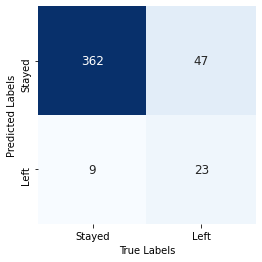

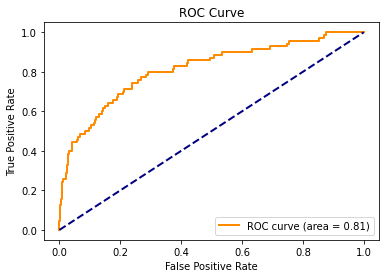

In [133]:
lr = classify(X_train, X_test, y_train, y_test, classifier='log_reg')

In [215]:
# Coefficients
pd.DataFrame(lr.coef_[0])

,0
0,-0.231990
1,0.076301
2,0.026562
3,-0.143974
4,0.323375
5,0.213881
6,-0.181800
7,-0.236900
8,-0.426928
9,-0.049568


In [218]:
# y intercept
lr.intercept_

array([-2.28911021])

In [183]:
import statsmodels.api as sm
log_reg = sm.Logit(y_train, X_train).fit()

         Current function value: 0.635915
         Iterations: 35


C:\Users\KesVa\Anaconda3\envs\py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [184]:
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1029
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                           33
Date:                Thu, 17 Dec 2020   Pseudo R-squ.:                 -0.4340
Time:                        14:32:45   Log-Likelihood:                -654.36
converged:                      False   LL-Null:                       -456.31
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0460        nan        nan        nan         nan         nan
x2             0.0467        nan        nan        nan         nan         nan
x3            -0.0275        nan        nan        n

#### Naive Bayes

GaussianNB:
Train Accuracy: 66.96%
Test Accuracy: 67.12%
              precision    recall  f1-score   support

           0       0.92      0.66      0.77       371
           1       0.29      0.71      0.41        70

    accuracy                           0.67       441
   macro avg       0.61      0.69      0.59       441
weighted avg       0.82      0.67      0.71       441



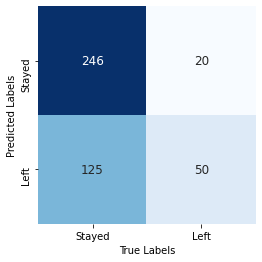

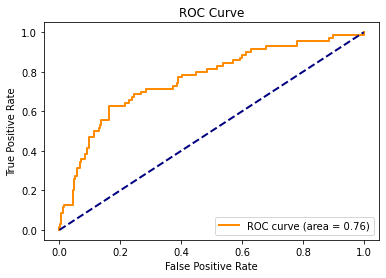

In [120]:
classify(X_train, X_test, y_train, y_test, classifier='nb')

#### Support Vector Machine

SVC:
Train Accuracy: 89.8%
Test Accuracy: 84.35%
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       371
           1       0.53      0.13      0.21        70

    accuracy                           0.84       441
   macro avg       0.69      0.55      0.56       441
weighted avg       0.80      0.84      0.80       441



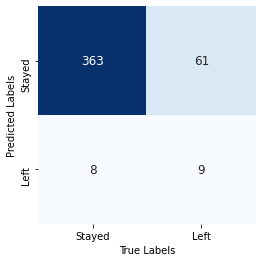

AttributeError: predict_proba is not available when  probability=False

In [121]:
classify(X_train, X_test, y_train, y_test, classifier='svm')

<a id='sgd'></a>
#### SGD Algorithm

[back to TOC](#section0)

SGDClassifier:
Train Accuracy: 81.73%
Test Accuracy: 80.05%
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       371
           1       0.34      0.29      0.31        70

    accuracy                           0.80       441
   macro avg       0.61      0.59      0.60       441
weighted avg       0.79      0.80      0.79       441



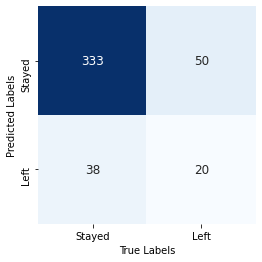

AttributeError: probability estimates are not available for loss='hinge'

In [122]:
classify(X_train, X_test, y_train, y_test, classifier='sgd')

<a id='decisiontree'></a>
#### Decision Tree

[back to TOC](#section0)

In [ ]:
param_grid = {'max_depth': range(1, 15, 2) ,
              'max_features': range(1, 15, 2)}
dt_g = DecisionTreeClassifier(random_state=42)
dt_cv = GridSearchCV(dt_g, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
dt_cv.fit(X_train, y_train)

print(f'Best parameters: {dt_cv.best_params_}')
print(f'Accuracy : {round(dt_cv.best_score_, 2)}')

DecisionTreeClassifier:
Train Accuracy: 100.0%
Test Accuracy: 79.14%
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       371
           1       0.34      0.34      0.34        70

    accuracy                           0.79       441
   macro avg       0.61      0.61      0.61       441
weighted avg       0.79      0.79      0.79       441



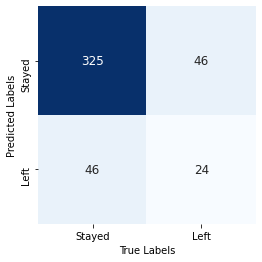

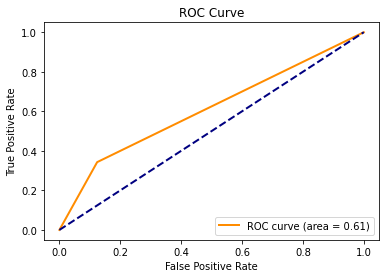

In [123]:
classify(X_train, X_test, y_train, y_test, 
         classifier='tree', max_depth=3,
         max_features=7)

<a id='monthly income'></a>
#### Random Forest Classifier

[back to TOC](#section0)

In [ ]:
param_grid = {'max_depth': range(1, 15, 2),
              'n_estimators': [125, 250],
              'max_features': range(1, 15, 2)}
dt_g = RandomForestClassifier(random_state=42)
dt_cv = GridSearchCV(dt_g, param_grid, cv=10, scoring='f1_micro', n_jobs=-1)
dt_cv.fit(X_train, y_train)

print(f'Best parameters: {dt_cv.best_params_}')
print(f'Accuracy : {round(dt_cv.best_score_, 2)}')

RandomForestClassifier:
Train Accuracy: 100.0%
Test Accuracy: 87.3%
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       371
           1       0.82      0.26      0.39        70

    accuracy                           0.87       441
   macro avg       0.85      0.62      0.66       441
weighted avg       0.87      0.87      0.84       441



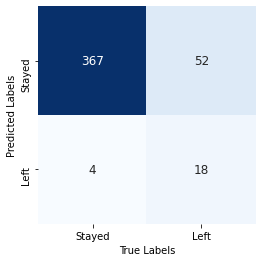

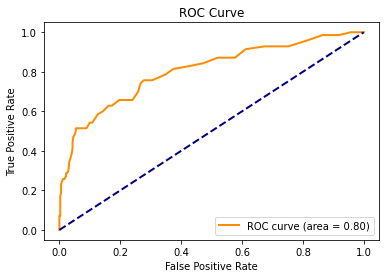

In [124]:
classify(X_train, X_test, y_train, y_test, 
         classifier='rfc', n_estimators=125, 
         max_depth=11, max_features=7)

<a id='years at company'></a>
#### Gradient Boosting Classifier

[back to TOC](#section0)

In [125]:
param_grid = {'max_depth': range(1, 15, 2),
              'n_estimators': [125, 250],
              'max_features': range(1, 15, 2)}
dt_g = GradientBoostingClassifier(random_state=42)
dt_cv = GridSearchCV(dt_g, param_grid, cv=10, scoring='f1_micro', n_jobs=-1)
dt_cv.fit(X_train, y_train)

print(f'Best parameters: {dt_cv.best_params_}')
print(f'Accuracy : {round(dt_cv.best_score_, 2)}')

Best parameters: {'max_depth': 3, 'max_features': 5, 'n_estimators': 250}
Accuracy : 0.87


GradientBoostingClassifier:
Train Accuracy: 95.04%
Test Accuracy: 86.39%
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       371
           1       0.64      0.33      0.43        70

    accuracy                           0.86       441
   macro avg       0.76      0.65      0.68       441
weighted avg       0.85      0.86      0.85       441



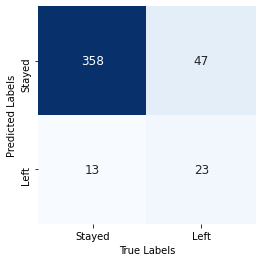

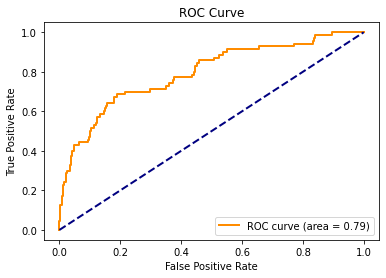

In [127]:
classify(X_train, X_test, y_train, y_test, classifier='gboost',
         max_depth=3, max_features=5, n_estimators=250)

#### K-Nearest Neighbor

KNeighborsClassifier:
Train Accuracy: 87.66%
Test Accuracy: 85.26%
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       371
           1       0.59      0.24      0.34        70

    accuracy                           0.85       441
   macro avg       0.73      0.61      0.63       441
weighted avg       0.83      0.85      0.83       441



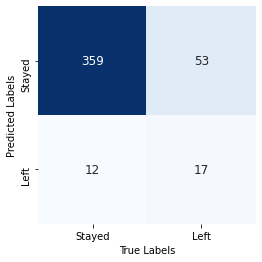

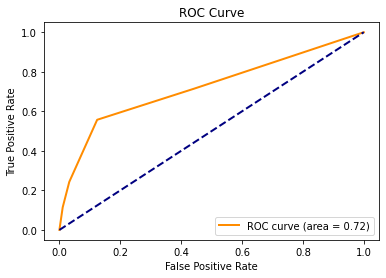

In [128]:
classify(X_train, X_test, y_train, y_test, classifier='knn')

### XGBoost

In [129]:
param_grid = {'max_depth': range(1, 15, 2),
              'n_estimators': [125, 250],
              'min_child_weight': [1, 3, 6]}
dt_g = XGBClassifier(random_state=42)
dt_cv = GridSearchCV(dt_g, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
dt_cv.fit(X_train, y_train)

print(f'Best parameters: {dt_cv.best_params_}')
print(f'Accuracy : {round(dt_cv.best_score_, 2)}')

[11:18:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters: {'max_depth': 1, 'min_child_weight': 6, 'n_estimators': 250}
Accuracy : 0.88


[11:34:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:34:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier:
Train Accuracy: 100.0%
Test Accuracy: 86.17%
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       371
           1       0.62      0.34      0.44        70

    accuracy                           0.86       441
   macro avg       0.75      0.65      0.68       441
weighted avg       0.84      0.86      0.84     

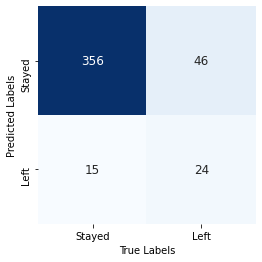

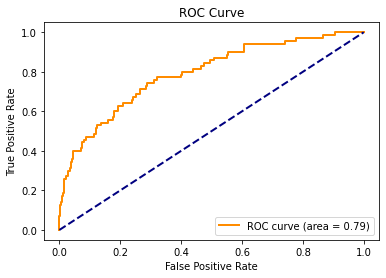

In [131]:
classify(X_train, X_test, y_train, y_test, classifier='xgboost',
         max_depth=1, min_child_weight=6, n_estimators=250)